This is an introduction to evolutionary computation in Python with NumPy.

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import random as rdm

In [79]:
class Mutation:
    def __init__(self, value, fit):
        self.value = value
        self.fit = fit

    def __gt__(self, mutation2):
        return self.fit > mutation2.fit

    def __str__(self):
        return "Mutation-Fitness: " + str(self.fit)

def sphere(value):
    return np.dot(value.T, value)

def crossover(parent1, parent2):
    return (parent1.value + parent2.value) / 2


In [80]:
n = 5
x = 2 * np.ones(n)

The first generation is: Mutation-Fitness: 20.796012104870663, Mutation-Fitness: 28.34258575615982, Mutation-Fitness: 25.22048415740292, Mutation-Fitness: 33.88545603803102, Mutation-Fitness: 27.048265235699898, Mutation-Fitness: 15.310868958440054, Mutation-Fitness: 35.19112466375783, Mutation-Fitness: 17.622704983551632, Mutation-Fitness: 24.298764759694702, Mutation-Fitness: 16.087180661884748, Mutation-Fitness: 29.681839195529825, Mutation-Fitness: 14.863987179372861, Mutation-Fitness: 28.731933017018434, Mutation-Fitness: 27.012506201569508, Mutation-Fitness: 30.903349632180284, Mutation-Fitness: 24.26676183229012, Mutation-Fitness: 10.985570694003883, Mutation-Fitness: 22.95573255967195, Mutation-Fitness: 25.028999792226834



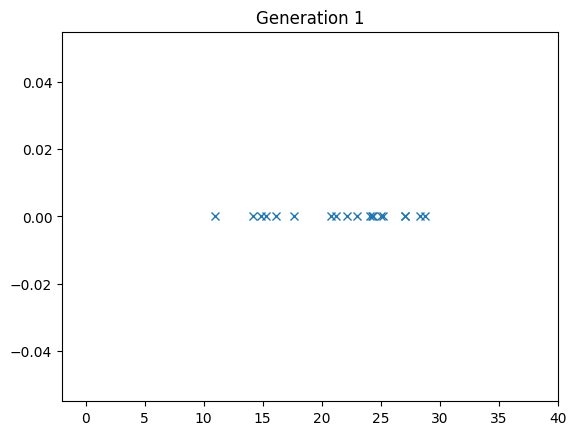

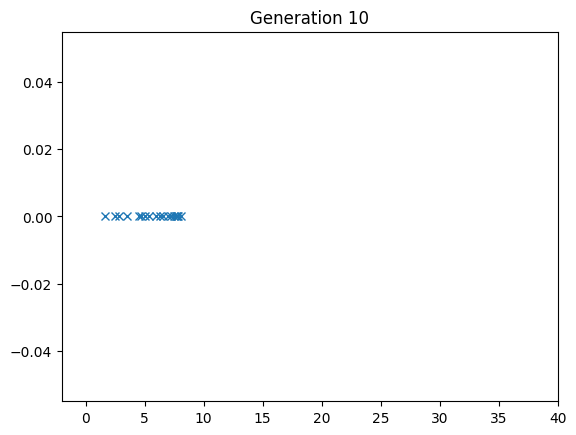

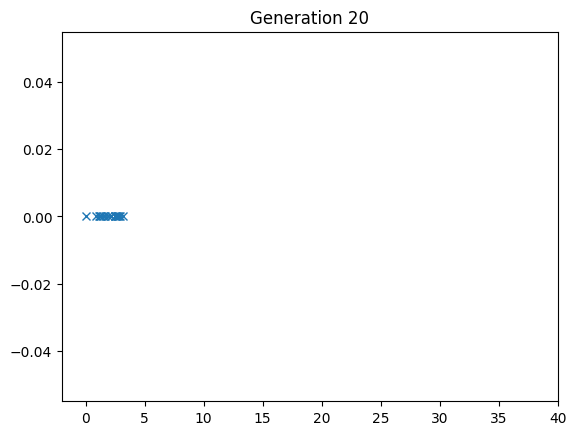

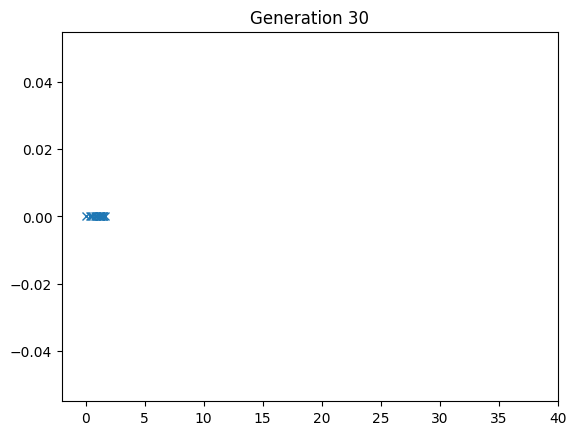

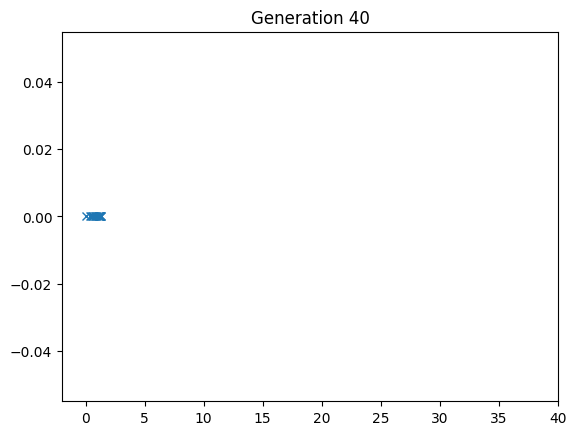

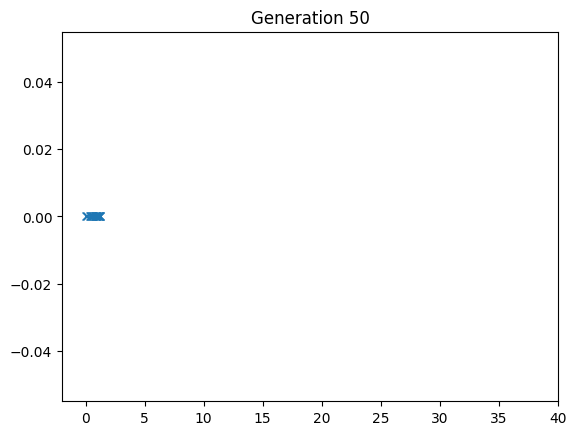

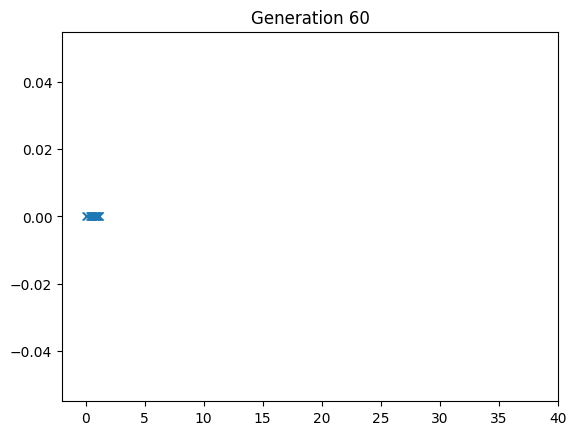

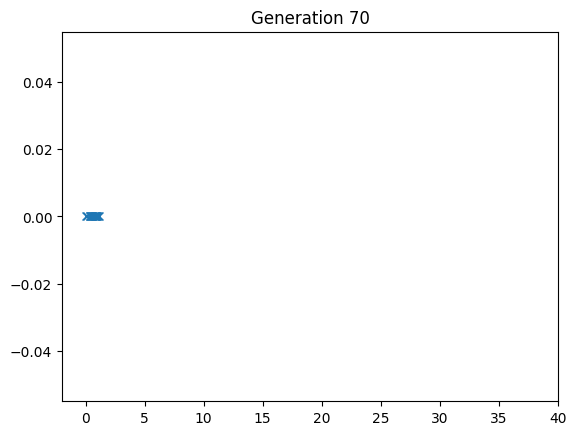

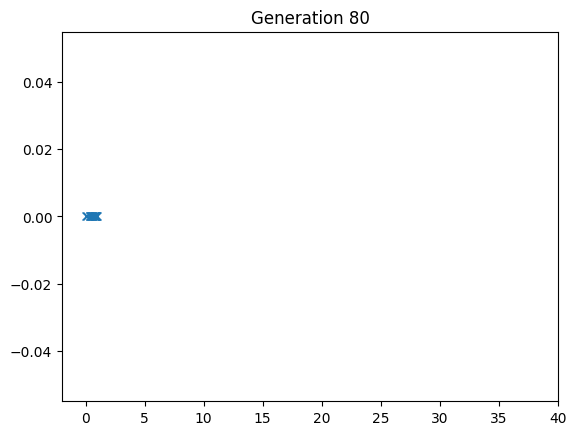

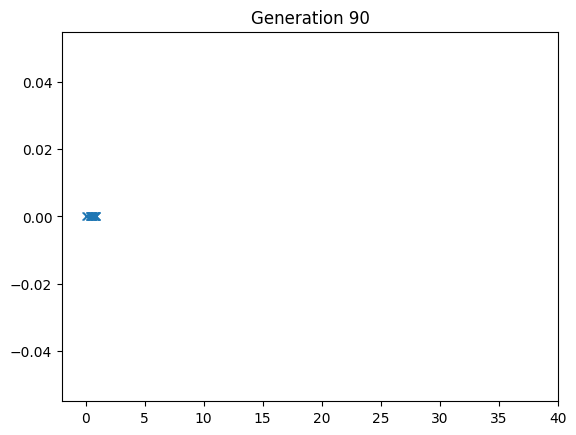

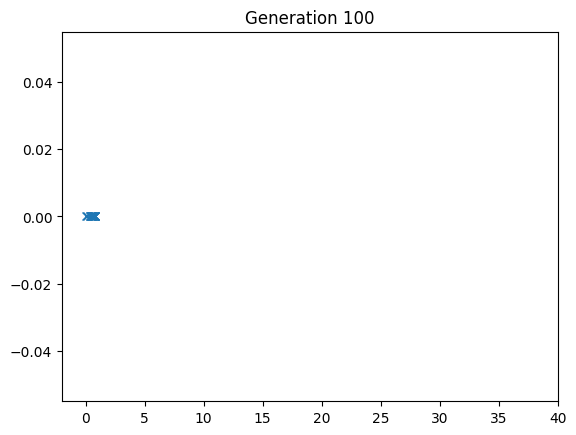

The last generation is: Mutation-Fitness: 0.05156548312611198, Mutation-Fitness: 0.1357738371965409, Mutation-Fitness: 0.3696354157143031, Mutation-Fitness: 0.3895593496028632, Mutation-Fitness: 0.4241007278676879, Mutation-Fitness: 0.4779724016567384, Mutation-Fitness: 0.49536225984893123, Mutation-Fitness: 0.5236855232119942, Mutation-Fitness: 0.5301298738538138, Mutation-Fitness: 0.5405673276565145, Mutation-Fitness: 0.5606157080202996, Mutation-Fitness: 0.6375317594548553, Mutation-Fitness: 0.6921562548947544, Mutation-Fitness: 0.6992646876505335, Mutation-Fitness: 0.7253876075336478, Mutation-Fitness: 0.7624288463337754, Mutation-Fitness: 0.8134012566116884, Mutation-Fitness: 0.8213251974830564, Mutation-Fitness: 0.8275942058461003


In [81]:
generation = 1
sigma = 1.0
parents_mue = 20
mutations_lambda = 10
population = []

# Generate initial mue parents for population
for i in range(1, parents_mue):
    x_ = x + sigma * np.random.randn(n)
    fitness = sphere(x_)

    mutation = Mutation(x_, fitness)
    population.append(mutation)
print("The first generation is:", ", ".join([str(m) for m in population]))
print()

# Compute 100 generations
while generation <= 100:
    # Crossover with 2 parents and intermediate recombination by mean value (repeat for number of mutations)
    for i in range(1, mutations_lambda):
        first_parent = rdm.randrange(len(population))
        second_parent = rdm.randrange(len(population))
        mean_value = crossover(population[first_parent], population[second_parent])
        # Mutation
        mean_value_ = mean_value + sigma * np.random.randn(n)
        fitness_ = sphere(mean_value_)

        mutation = Mutation(mean_value_, fitness_)
        population.append(mutation)

    # Now select the best (minimal) mue parents out of complete population (parent + mutations)
    population.sort()
    population = population[:parents_mue - 1]

    # Show actual distribution of fitness among population
    if generation == 1 or generation % 10 == 0:
        plt.plot([p.fit for p in population], np.zeros_like([p.fit for p in population]), 'x')
        plt.xlim(-2, 40)
        plt.title('Generation ' + str(generation))
        plt.show()

    generation += 1

# Return the last generation
print("The last generation is:", ", ".join([str(m) for m in population]))